In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import mne
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    

In [2]:
from cerebra_atlas_python.cerebra import CerebrA, setup_logging
from cerebra_atlas_python.plotting import  plot_brain_slice_2D, get_cmap

In [3]:
setup_logging(level="INFO")
cerebra = CerebrA()

array([[<AxesSubplot:xlabel='Y', ylabel='Z'>,
        <AxesSubplot:xlabel='X', ylabel='Z'>],
       [<AxesSubplot:xlabel='X', ylabel='Y'>, <AxesSubplot:>]],
      dtype=object)

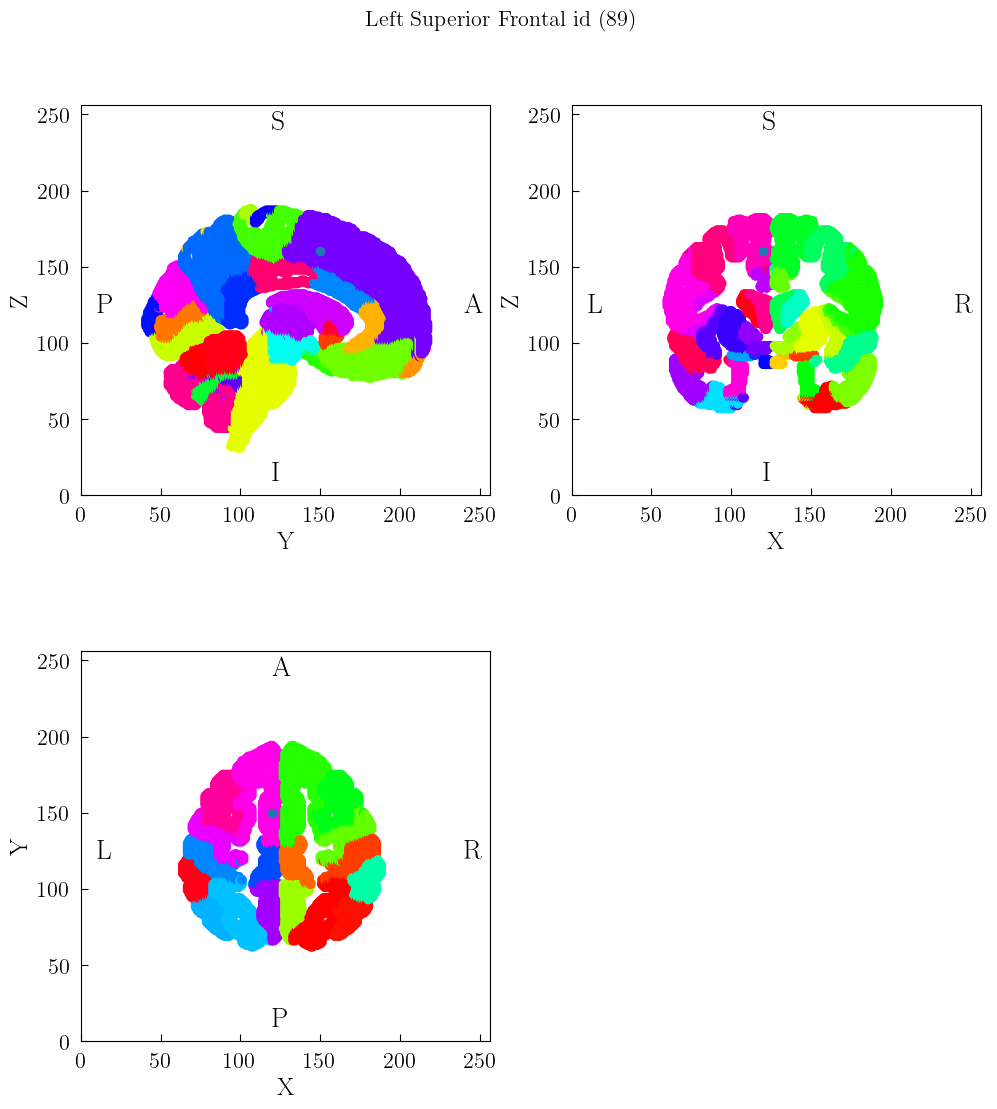

In [4]:
cerebra.orthoview(pt=[120, 150, 160])

array([[<AxesSubplot:xlabel='Y', ylabel='Z'>,
        <AxesSubplot:xlabel='X', ylabel='Z'>],
       [<AxesSubplot:xlabel='X', ylabel='Y'>, <AxesSubplot:>]],
      dtype=object)

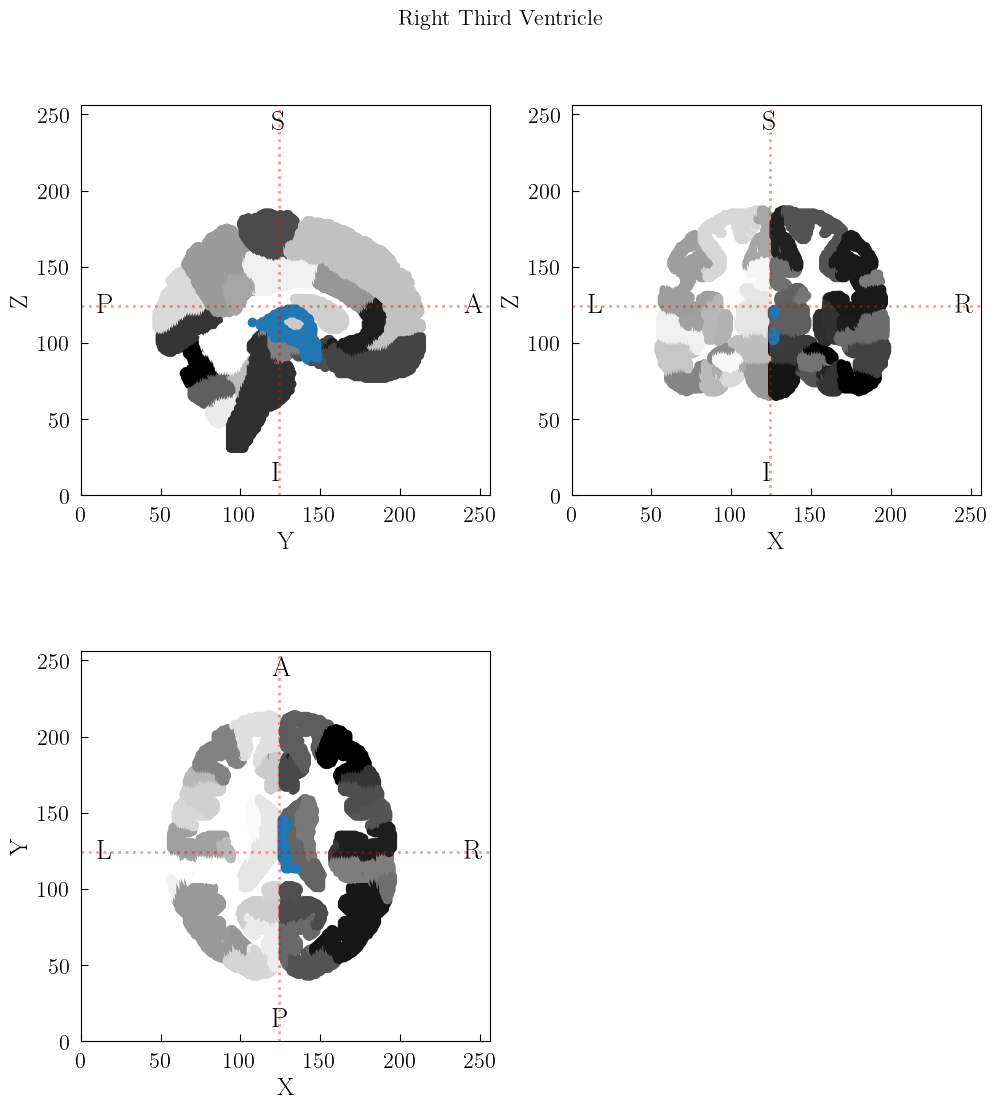

In [5]:
cerebra.plot_region_orthoview(region_id=29)

array([[<AxesSubplot:xlabel='Y', ylabel='Z'>,
        <AxesSubplot:xlabel='X', ylabel='Z'>],
       [<AxesSubplot:xlabel='X', ylabel='Y'>, <AxesSubplot:>]],
      dtype=object)

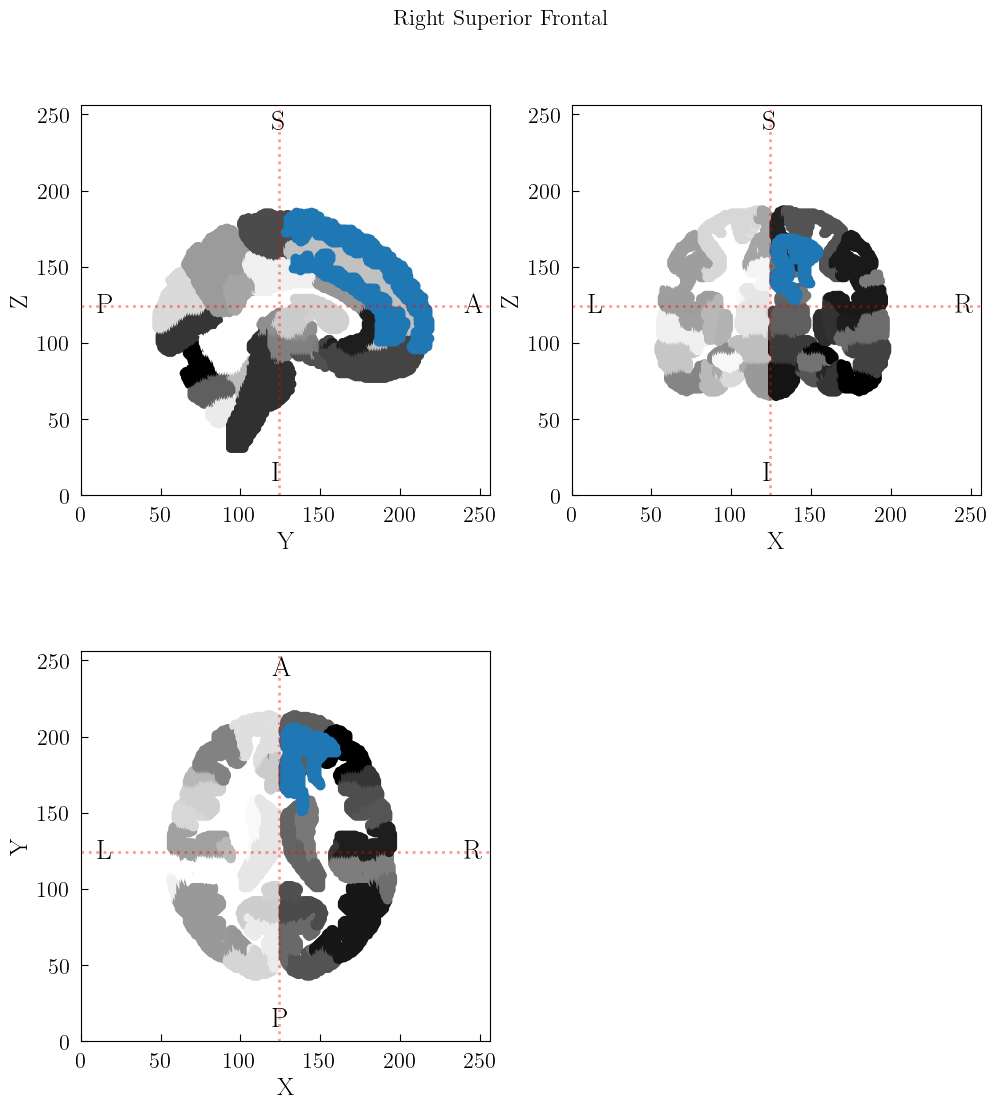

In [6]:
cerebra.plot_region_orthoview(region_id=89-51)

In [8]:
%matplotlib qt
cerebra.plot_3d()

In [10]:
cerebra.plot_region_3d(29)